(50, 2)
(50, 1)
iteration times: 0
W: [[3.4422526e-05]
 [2.2431634e-05]] 
b: [7.536556e-05] 
Train Loss: 0.095660314
Test Loss: 0.122091904

iteration times: 100000
W: [[ 0.34876078]
 [-0.4445611 ]] 
b: [0.40364408] 
Train Loss: 0.007903346
Test Loss: 0.004828136

iteration times: 200000
W: [[ 0.52424943]
 [-0.71647364]] 
b: [0.43973732] 
Train Loss: 0.0024309573
Test Loss: 0.0012166699

iteration times: 300000
W: [[ 0.63378  ]
 [-0.8588557]] 
b: [0.45082736] 
Train Loss: 0.0007622265
Test Loss: 0.00029435699

iteration times: 400000
W: [[ 0.69782954]
 [-0.93618083]] 
b: [0.45485282] 
Train Loss: 0.00024147338
Test Loss: 7.637401e-05

iteration times: 500000
W: [[ 0.7344782]
 [-0.9788271]] 
b: [0.45655513] 
Train Loss: 7.796503e-05
Test Loss: 4.368423e-05

iteration times: 600000
W: [[ 0.755049 ]
 [-1.0025738]] 
b: [0.4573638] 
Train Loss: 2.6596446e-05
Test Loss: 5.2485626e-05

iteration times: 700000
W: [[ 0.76619464]
 [-1.0145932 ]] 
b: [0.45742148] 
Train Loss: 1.1197945e-05
Test L

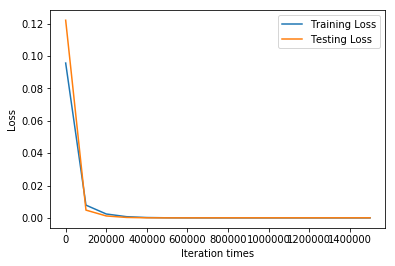

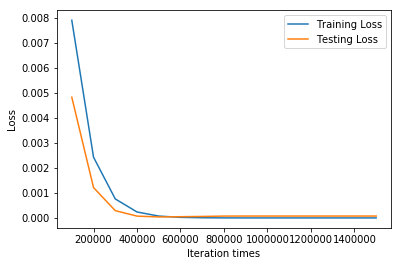

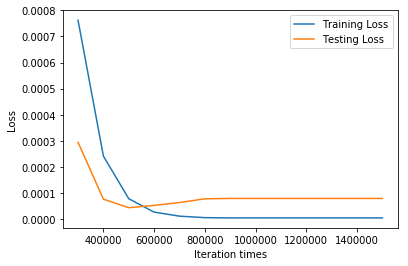

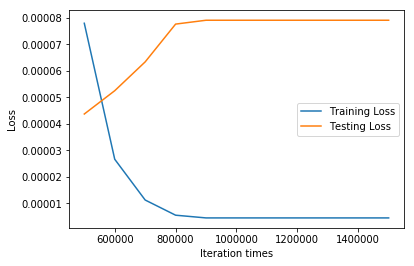

Train Loss:
 [0.095660314, 0.007903346, 0.0024309573, 0.0007622265, 0.00024147338, 7.796503e-05, 2.6596446e-05, 1.1197945e-05, 5.463813e-06, 4.4367066e-06, 4.4367066e-06, 4.4367066e-06, 4.4367066e-06, 4.4367066e-06, 4.4367066e-06, 4.4367066e-06]

Test Loss:
 [0.122091904, 0.004828136, 0.0012166699, 0.00029435699, 7.637401e-05, 4.368423e-05, 5.2485626e-05, 6.337282e-05, 7.764882e-05, 7.910379e-05, 7.910379e-05, 7.910379e-05, 7.910379e-05, 7.910379e-05, 7.910379e-05, 7.910379e-05]


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing   

# Try to find value for W and b to compute y_data = x_data * W + b  

# Define dimensions
d = 2    # Size of the parameter space
N = 50 # Number of data sample

# Model parameters
W = tf.Variable(tf.zeros([d, 1], tf.float32), name="weights")
b = tf.Variable(tf.zeros([1], tf.float32), name="biases")

# Model input and output
x = tf.placeholder(tf.float32, shape=[None, d])
y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis
linear_regression_model = tf.add(tf.matmul(x, W), b)
# cost/loss function
loss = tf.reduce_mean(tf.square(linear_regression_model - y)) / 2

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0002)
train = optimizer.minimize(loss)

training_filename = "dataForTraining.txt"
testing_filename = "dataForTesting.txt"
training_dataset = np.loadtxt("dataForTraining.txt")
testing_dataset = np.loadtxt("dataForTesting.txt")

dataset = np.vstack((training_dataset,testing_dataset))
min_max_scaler = preprocessing.MinMaxScaler()  
dataset = min_max_scaler.fit_transform(dataset)

# x_train = np.array(training_dataset[:,:2])
# y_train = np.array(training_dataset[:,2:3])
# x_test = np.array(testing_dataset[:,:2])
# y_test = np.array(testing_dataset[:,2:3])
x_train = np.array(dataset[:50,:2])
y_train = np.array(dataset[:50,2:3])
x_test = np.array(dataset[50:,:2])
y_test = np.array(dataset[50:,2:3])
print(x_train.shape)
print(y_train.shape)

save_step_loss = {"step":[],"train_loss":[],"test_loss":[]}# 保存step和loss用于可视化操作

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # reset values to wrong
    steps = 1500001
    for i in range(steps):
        sess.run(train, {x: x_train, y: y_train})
        if i % 100000 == 0:
            # evaluate training accuracy
            print("iteration times: %s" % i)
            curr_W, curr_b, curr_train_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
            print("W: %s \nb: %s \nTrain Loss: %s" % (curr_W, curr_b, curr_train_loss))
            # Accuracy computation
            curr_test_loss = sess.run(loss,{x:x_test,y:y_test})
            print("Test Loss: %s\n" % curr_test_loss)
            save_step_loss["step"].append(i)
            save_step_loss["train_loss"].append(curr_train_loss)
            save_step_loss["test_loss"].append(curr_test_loss)

#画图损失函数变化曲线
plt.plot(save_step_loss["step"],save_step_loss["train_loss"],label='Training Loss')
plt.plot(save_step_loss["step"],save_step_loss["test_loss"],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][1:],save_step_loss["train_loss"][1:],label='Training Loss')
plt.plot(save_step_loss["step"][1:],save_step_loss["test_loss"][1:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][3:],save_step_loss["train_loss"][3:],label='Training Loss')
plt.plot(save_step_loss["step"][3:],save_step_loss["test_loss"][3:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][5:],save_step_loss["train_loss"][5:],label='Training Loss')
plt.plot(save_step_loss["step"][5:],save_step_loss["test_loss"][5:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Train Loss:\n',save_step_loss["train_loss"])
print('')
print('Test Loss:\n',save_step_loss["test_loss"])